# Understanding Data


### Required Libraries

In [5]:
! pip install -q pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading Dataset

In [7]:
df = pd.read_csv("../data/raw/Credit Risk Benchmark Dataset.csv")

### Basic Inspection

In [8]:
df.shape
df.head()
df.columns
df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev_util     16714 non-null  float64
 1   age          16714 non-null  float64
 2   late_30_59   16714 non-null  float64
 3   debt_ratio   16714 non-null  float64
 4   monthly_inc  16714 non-null  float64
 5   open_credit  16714 non-null  float64
 6   late_90      16714 non-null  float64
 7   real_estate  16714 non-null  float64
 8   late_60_89   16714 non-null  float64
 9   dependents   16714 non-null  float64
 10  dlq_2yrs     16714 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.4 MB


,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
count,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000,16714.000000
mean,4.799862,48.798672,1.110267,30.980298,6118.120258,8.503709,0.863827,1.047445,0.734354,0.944358,0.500000
std,204.062345,13.906078,7.172890,719.694859,5931.841779,5.370965,7.167576,1.272565,7.138737,1.198791,0.500015
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.082397,38.000000,0.000000,0.155971,3128.500000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.443080,48.000000,0.000000,0.322299,5000.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.500000
75%,0.926637,58.000000,1.000000,0.533426,7573.000000,11.000000,0.000000,2.000000,0.000000,2.000000,1.000000
max,22000.000000,101.000000,98.000000,61106.500000,250000.000000,57.000000,98.000000,29.000000,98.000000,8.000000,1.000000


### Missing Values Analysis

In [9]:
df.isnull().sum()

rev_util       0
age            0
late_30_59     0
debt_ratio     0
monthly_inc    0
open_credit    0
late_90        0
real_estate    0
late_60_89     0
dependents     0
dlq_2yrs       0
dtype: int64

No Missing Values Found in the entire dataset

### Checking and Removing Duplicates

In [10]:
int(df.duplicated().sum())

2

### Checking Distribution

In [13]:
df['dlq_2yrs'].value_counts()

dlq_2yrs
0    8357
1    8355
Name: count, dtype: int64

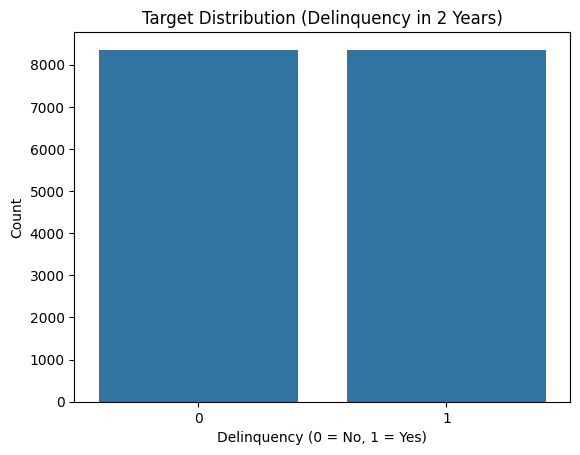

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='dlq_2yrs', data=df)
plt.title("Target Distribution (Delinquency in 2 Years)")
plt.xlabel("Delinquency (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Final Understanding

---

## Dataset Overview
The dataset contains **16,714 borrower records** with **11 numerical features** describing demographic characteristics, financial behavior, and historical credit performance.

- **Total Observations:** 16,714  
- **Total Features:** 11  
- **Predictor Variables:** 10  
- **Target Variable:** `dlq_2yrs` (Delinquency within 2 years)

All variables are numeric, making the dataset directly compatible with machine learning algorithms without categorical encoding.

---

## Data Quality Assessment

### Missing Values
✔ No missing values were detected across any feature.  
This indicates strong dataset completeness and eliminates the need for imputation.

### Duplicate Records
✔ Only **2 duplicate rows** were identified and removed to maintain data integrity.

---

## Target Variable Analysis

| Class | Meaning | Count |
|------|---------|------|
| 0 | No Delinquency | 8357 |
| 1 | Delinquency | 8355 |

The dataset is **perfectly balanced**, which is highly beneficial for predictive modeling since no resampling or imbalance correction techniques are required.

---

## Feature Insights

### Demographic Characteristics
- Borrower age ranges from **21 to 101 years**.
- Wide demographic coverage enables meaningful risk segmentation.

### Financial Indicators
- `monthly_inc` and `debt_ratio` exhibit **high variability and strong skewness**.
- Extremely large maximum values suggest the presence of financial outliers.

### Credit Behavior
- `rev_util` (revolving utilization) shows unusually large values, indicating potential anomalies or heavy-tailed distributions.
- Number of open credit lines varies substantially across borrowers.

### Delinquency History
- Variables such as `late_30_59`, `late_60_89`, and `late_90` capture past repayment behavior.
- These variables are expected to be **strong predictors of future credit risk**.

---

## Key Observations

- Financial variables contain **extreme outliers**, common in credit datasets.
- Feature scales differ significantly.
- Several variables demonstrate right-skewed distributions.

---

## Overall Interpretation

The dataset demonstrates **high data quality**, balanced class distribution, and meaningful financial risk indicators. Historical delinquency behavior and credit utilization metrics are likely to play a central role in predicting borrower default risk.

The data is suitable for machine learning modeling; however, the following preprocessing steps are recommended:

- Outlier treatment  
- Feature scaling / normalization  
- Distribution transformation (if required)  
- Train–test splitting before model development  

---